In [1]:
import pandas as pd
import numpy as np
import os 
import pickle
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer() 
english_stopwords = set(stopwords.words('english')) 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
import string
from re import search

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utsavbaghela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utsavbaghela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/utsavbaghela/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("Q2_dataset.txt", header=None, sep=" ",)

In [3]:
df=df[df[1]=='qid:4']

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


In [5]:
#Retriving all the unique value of 0th column
values = df[0].unique()
print(values)

[0 1 3 2]


In [6]:
import math

no_of_rows_in_each_value = []
number_of_files=1
#for loop for all the unique values in the 
for i in values:
    #lenOflist holds the number of rows with unique_vals for atttribute 0
    count= len(df[df[0]==i])
    no_of_rows_in_each_value.append(count)
    number_of_files = number_of_files* math.factorial(count)
    
print("Number of files after rearranging: ",number_of_files)




Number of files after rearranging:  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [7]:
#dataframe q3_dfr holds the sorted values in descending order
df_sorted_on_dcg = df.sort_values(by = 0, ascending = False )
df_sorted_on_dcg = df_sorted_on_dcg.reset_index(drop=True)
#saving the dataframe to csv
df_sorted_on_dcg.to_csv('df_sorted_on_dcg.csv')

In [8]:
df_sorted_on_dcg

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0,NaN
99,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0,NaN
100,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0,NaN
101,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0,NaN


In [9]:
def DCG_Calculator(n, data):
    dcg_answer = 0;
    for i in range(1, n+1):
        dcg_answer = dcg_answer + (pow(2, data[0][i-1]) - 1)/(np.log2(i+1))
    return dcg_answer

In [10]:
#nDCG at 50
dcg_at_df = DCG_Calculator(50,df)
dcg_at_df_sorted_on_dcg = DCG_Calculator(50,df_sorted_on_dcg)
print("nDCG at 50:",dcg_at_df/dcg_at_df_sorted_on_dcg)


nDCG at 50: 0.35612494416255847


In [11]:
#nDCG at full Dataset
len_df = len(df)
len_sorted_df = len(df_sorted_on_dcg)
dcg_at_df_full = DCG_Calculator(len_df,df)
dcg_at_df_sorted_on_dcg_full = DCG_Calculator(len_sorted_df,df_sorted_on_dcg)
print("nDCG at Full Dataset:",dcg_at_df_full/dcg_at_df_sorted_on_dcg_full)

nDCG at Full Dataset: 0.5784691984582591


#### Part 3


In [86]:
df_col75=df[76].str[3:]
df_col0=df[0]
df_col75=df_col75.to_list();
df_col0=df_col0.to_list();
print(df_col75)
print(df_col0)

['90.53171', '538.388954', '88.171761', '144.564444', '142.589323', '463.099129', '103.400313', '411.010633', '972.826451', '142.589323', '84.625987', '91.160998', '180.720002', '237.21632', '22.480108', '84.625987', '14.972391', '42.227139', '81.947653', '157.05992', '84.625987', '143.445062', '166.683125', '70.466293', '121.96152', '69.811973', '74.434086', '186.375414', '79.630746', '176.875026', '19.313312', '187.934366', '94.958714', '121.007996', '89.877389', '85.634253', '217.848266', '156.301965', '200.840161', '201.720933', '192.953467', '212.401296', '169.844071', '148.415271', '148.415271', '91.717534', '143.769297', '71.646268', '185.617459', '3.539923', '176.000104', '76.360315', '237.21632', '202.442155', '305.102064', '188.936782', '571.500533', '68.100494', '142.038637', '188.129935', '439.396463', '161.455583', '161.15638', '98.418404', '43.297629', '226.444023', '77.167163', '612.893205', '121.814843', '95.257458', '18.133337', '95.257458', '198.480212', '316.319283',

In [120]:
values_final = [x for _,x in sorted(zip(df_col75,df_col0),reverse=True)]
jreleveance_Score=0


for j in values_final:
    if j!=0:
        jreleveance_Score+=1
          
precision_values=[]
recall_values=[]
relevence_score=0

current_count=0
for j in values_final:
    if j!=0:
        relevence_score+=1
    current_count+=1
    precision_values.append(relevence_score/current_count)
    recall_values.append(relevence_score/jreleveance_Score)

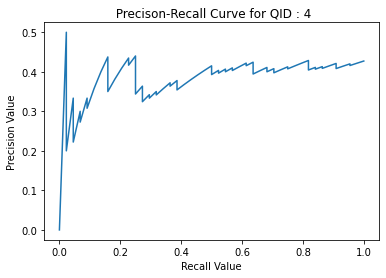

In [122]:
plt.plot(recall_values,precision_values)
plt.xlabel("Recall Value")
plt.title(" Precison-Recall Curve for QID : 4")
plt.ylabel("Precision Value")
plt.show()